In [1]:
import os
import numpy as np
import pickle
from tqdm import tqdm_notebook              
from functools import partial               # 함수 변수 고정
import warnings
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")           # 경고 문구 미표시
import random
random.seed(42)
# Subsample train set, Memory Error

# 이 실습 파일이 위치하고 있는 경로!
PROJECT_PATH = "/opt/ml/notebooks/kaggle_riid"

# 데이터셋이 모아져있는 폴더
# DATA_PATH = os.path.join(PROJECT_PATH, 'dataset')
DATA_PATH = os.path.join(PROJECT_PATH, 'dataset')
RIIID_PATH = DATA_PATH

In [ ]:

# RiiiD 데이터셋 path 설정

# 데이터셋 불러오기
train_df = pd.read_csv(os.path.join(RIIID_PATH, 'train.csv'))
lectures_df = pd.read_csv(os.path.join(RIIID_PATH, 'lectures.csv'))
questions_df = pd.read_csv(os.path.join(RIIID_PATH, 'questions.csv'))

In [2]:
def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            #print("******************************")
            #print("Column: ",col)
            #print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            
            # Print new column type
            #print("dtype after: ",props[col].dtype)
            #print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist
    


In [ ]:
train_df, NAlist = reduce_mem_usage(train_df)
print("_________________")
print("Warning: the following columns have missing values filled with 'df['column_name'].min() -1': ")
print("_________________")
print("")
print(NAlist)

In [ ]:
lectures_df, NAlist = reduce_mem_usage(lectures_df)
print(NAlist)
questions_df, NAlist = reduce_mem_usage(questions_df)
print(NAlist)

In [ ]:
train_df.to_pickle(os.path.join(RIIID_PATH, 'train.pkl'))
questions_df.to_pickle(os.path.join(RIIID_PATH, 'questions.pkl'))
lectures_df.to_pickle(os.path.join(RIIID_PATH, 'lectures.pkl'))


In [3]:

train_df = pd.read_pickle(os.path.join(RIIID_PATH,'train.pkl'))
questions_df = pd.read_pickle(os.path.join(RIIID_PATH,'questions.pkl'))
lectures_df = pd.read_pickle(os.path.join(RIIID_PATH,'lectures.pkl'))


In [4]:
original_train = pd.read_csv('/opt/ml/input/data/train_dataset/train_data.csv')
original_train.head()

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225


In [5]:
original_train

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225
...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836


In [33]:
original_train.KnowledgeTag.value_counts()

7597    12892
7600    10734
2010    10176
7621     9709
8127     9006
        ...  
5142       47
2871       46
4978       46
7125       45
2613       44
Name: KnowledgeTag, Length: 912, dtype: int64

In [ ]:
# from collections import Counter
# questions_df.tags = questions_df.tags.astype(object)
# all_tags = ' '.join([str(t) for t in questions_df.tags])
# all_tags = all_tags.split()
# print(len(Counter(all_tags)))
# print(len(top_k))
# import matplotlib.pyplot as plt
# plt.hist(all_tags)
# plt.title('After join, histogram')

In [4]:
# train_df.sample(5)

In [5]:
# lectures_df.sample(5)

In [6]:
# questions_df.sample(5)

In [ ]:
# print(len(set(lectures_df.tag)))
# print(len(set(questions_df.tags)))
# print(len(set(questions_df.tags)|set(lectures_df.tag)))

## questions_df랑 lectures_df 합치기

In [8]:
# column 이름 변경
questions_df = questions_df.rename({'question_id':'content_id'}, axis=1)
lectures_df = lectures_df.rename({'lecture_id':'content_id', 'tag':'tags'}, axis=1)
lectures_df.tags = lectures_df.tags.apply(lambda x: str(int(float(x))))

# NaN값 채우기
questions_df['tags'] = questions_df['tags'].fillna('')        

# 데이터 타입 변경
lectures_df['tags'] = lectures_df['tags'].astype(str)

# 필요없는 column 삭제
# questions_df = questions_df.drop('bundle_id', axis=1)

# 새로운 feature 생성
questions_df['content_type_id'] = 0
lectures_df['content_type_id'] = 1

In [9]:
# 데이터셋 합치기
question_lectures_df = pd.concat([questions_df, lectures_df])

In [10]:
questions_df.tags.value_counts()

8                      738
73                     617
53                     523
1                      413
96                     373
                      ... 
62 90 100 162 81 29      1
39 0 146 11 122          1
106 169 102              1
157 67 162 38            1
131 13 102               1
Name: tags, Length: 1520, dtype: int64

In [11]:
lectures_df.tags.value_counts()

136    7
134    6
74     6
113    6
27     6
      ..
139    1
12     1
150    1
126    1
155    1
Name: tags, Length: 151, dtype: int64

In [12]:
question_lectures_df.tags.value_counts()

8                   742
73                  621
53                  527
1                   417
96                  377
                   ... 
136 183 162 92        1
62 137 88 92 29       1
82 126 162 92         1
39 160 16 22 122      1
82 120 162 92         1
Name: tags, Length: 1596, dtype: int64

In [13]:
# question_lectures_df 추출 : tag기준 빈도수 top 913까지만 row 추출
# question_lectures_df = question_lectures_df.loc[question_lectures_df.tags.isin(question_lectures_df.tags.value_counts()[:913].index)]

In [14]:
questions_df.head(3)

,content_id,bundle_id,correct_answer,part,tags,content_type_id
0,0.0,0.0,0.0,1.0,51 131 162 38,0
1,1.0,1.0,1.0,1.0,131 36 81,0
2,2.0,2.0,0.0,1.0,131 101 162 92,0


In [15]:
lectures_df.head(3)

,content_id,tags,part,type_of,content_type_id
0,89.0,159,5.0,concept,1
1,100.0,70,1.0,concept,1
2,185.0,45,6.0,concept,1


In [16]:
# 합쳐진 데이터셋 확인
question_lectures_df.head(3)

,content_id,bundle_id,correct_answer,part,tags,content_type_id,type_of
0,0.0,0.0,0.0,1.0,51 131 162 38,0,NaN
1,1.0,1.0,1.0,1.0,131 36 81,0,NaN
2,2.0,2.0,0.0,1.0,131 101 162 92,0,NaN


In [17]:
question_lectures_df.content_type_id.value_counts()

0    13523
1      418
Name: content_type_id, dtype: int64

In [18]:
## lecture_df에는 정답여부가 없는데?
question_lectures_df.loc[question_lectures_df.content_id==89,:]

,content_id,bundle_id,correct_answer,part,tags,content_type_id,type_of
89,89.0,89.0,1.0,1.0,131 36 38,0,NaN
0,89.0,NaN,NaN,5.0,159,1,concept


In [19]:
print(questions_df.shape)
print(lectures_df.shape)
# print(question_lectures_df.shape)

(13523, 6)
(418, 5)


## train_df에 questions_df만 합치기
question_df의 content_id (question_id)가 key가 됨

In [20]:
print(train_df.shape)
print(train_df.columns)

(101230332, 10)
Index(['row_id', 'timestamp', 'user_id', 'content_id', 'content_type_id',
       'task_container_id', 'user_answer', 'answered_correctly',
       'prior_question_elapsed_time', 'prior_question_had_explanation'],
      dtype='object')


In [21]:
train_df = train_df.merge(questions_df, how='left', on=['content_id', 'content_type_id'])
del questions_df
del lectures_df

In [35]:
correct = original_train[original_train.answerCode != -1].answerCode.value_counts(ascending=True)
correct = round(correct/sum(correct.values)*100,2)
correct

0    34.56
1    65.44
Name: answerCode, dtype: float64

## Riid Data & Our Data
정답률 분포 확인

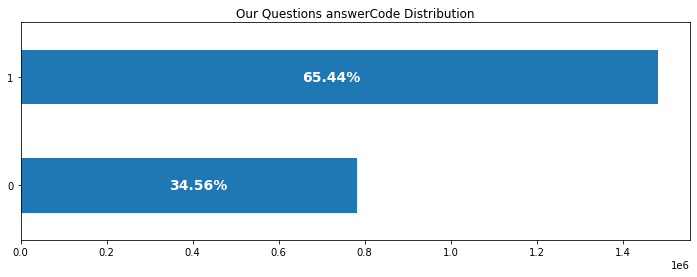

In [60]:
correct = original_train[original_train.answerCode != -1].answerCode.value_counts(ascending=True)

fig = plt.figure(figsize=(12,4))
correct.plot.barh()
correct = round(correct/sum(correct.values)*100,2)
for i, v in zip(correct.index, correct.values):
    # plt.text(v, i, '{:,}'.format(v), color='white', fontweight='bold', fontsize=14, ha='right', va='center')
    plt.text(v*10000, i, f'{v}%', color='white', fontweight='bold', fontsize=14, ha='left', va='center')
plt.title("Our Questions answerCode Distribution")
plt.xticks(rotation=0)
plt.show()

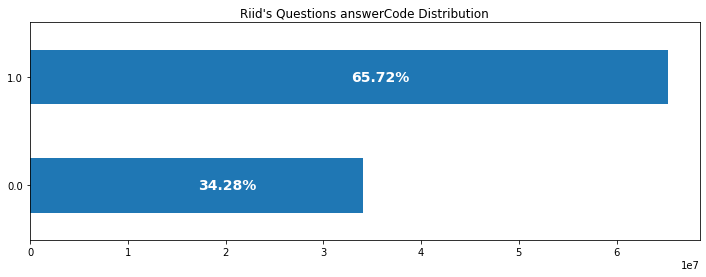

In [66]:
correct = train_df[train_df.answered_correctly != -1].answered_correctly.value_counts(ascending=True)

fig = plt.figure(figsize=(12,4))
correct.plot.barh()
correct = round(correct/sum(correct.values)*100,2)
for i, v in zip(correct.index, correct.values):
    # plt.text(v, i, '{:,}'.format(v), color='white', fontweight='bold', fontsize=14, ha='right', va='center')
    plt.text(v*500000, i, f'{v}%', color='white', fontweight='bold', fontsize=14, ha='left', va='center')
plt.title("Riid's Questions answerCode Distribution")
plt.xticks(rotation=0)
plt.show()

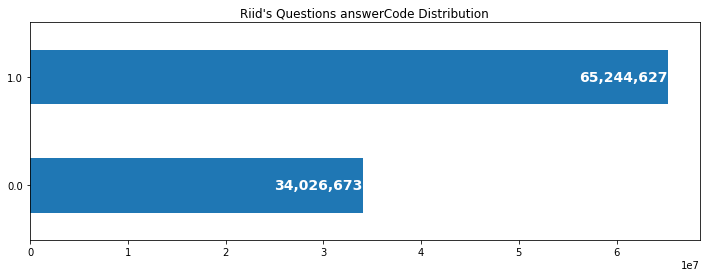

In [22]:
correct = train_df[train_df.answered_correctly != -1].answered_correctly.value_counts(ascending=True)

fig = plt.figure(figsize=(12,4))
correct.plot.barh()
for i, v in zip(correct.index, correct.values):
    plt.text(v, i, '{:,}'.format(v), color='white', fontweight='bold', fontsize=14, ha='right', va='center')
plt.title("Riid's Questions answerCode Distribution")
plt.xticks(rotation=0)
plt.show()

In [7]:
print(train_df.shape)
train_df.head(3)

(101230332, 14)


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags
0,0.0,0.0,115.0,5692.0,0.0,1.0,3.0,1.0,-1.0,NaN,5692.0,3.0,5.0,151
1,1.0,56943.0,115.0,5716.0,0.0,2.0,2.0,1.0,37000.0,False,5716.0,2.0,5.0,168
2,2.0,118363.0,115.0,128.0,0.0,0.0,0.0,1.0,55000.0,False,128.0,0.0,1.0,131 149 92


In [2]:
train_df.drop(
    ['row_id','content_type_id','prior_question_elapsed_time','user_answer','prior_question_had_explanation','correct_answer'], #'type_of',
    axis=1,
    inplace=True)

In [1]:
# import pandas as pd
# train_df.to_pickle('/opt/ml/notebooks/kaggle_riid/dataset/checkpoint_train.pkl')
# train_df = pd.read_pickle('/opt/ml/notebooks/kaggle_riid/dataset/checkpoint_train.pkl')
# original_train = pd.read_csv('/opt/ml/input/data/train_dataset/train_data.csv')

## testID를 대체가능한 변수는
7가지 유형을 나타내는 part? 보다는 task_container_id or bundle_id, 인듯 한데..

task_container_id를 testID로 해본 결과 => train과 test가 서로 같은 범주 내에 없음, train에서 등장하지 않았던 id가 test에 등장함.

변수를 수정해야하는 부분이 있을듯 => 하는김에 part라는 난이도 (혹은 시험유형) 정보가 (문제id나 시험id에) 반영되도록 바꾸자

아래그림처럼 원래는 part별로 id가 전부 다르지가 않음

> 이로부터 문제ID도 마찬가지 방법으로 적용해야 할듯

### Part 카테고리별 변수들의 분포
Riid Data 내에서 Part라는 변수가 우리 데이터 testId의 `대분류`와 의미가 비슷해보인다.

Part별로 시험지 혹은 문제가 겹치는지 안 겹치는지를 시각화로 확인해보았다.


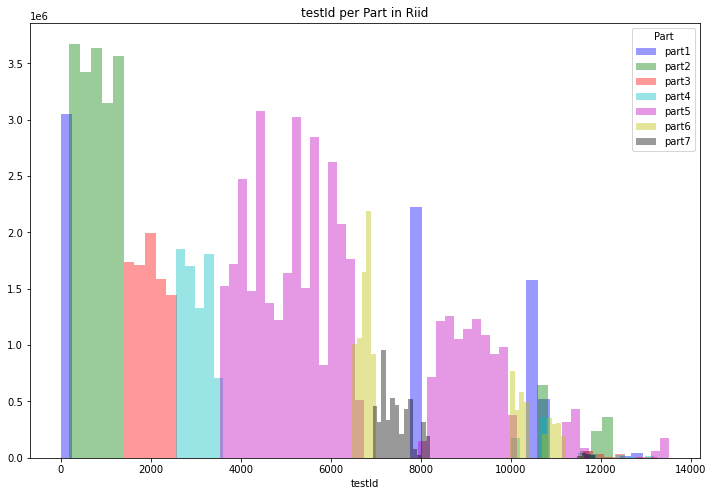

In [69]:
# Memory Error 조심
import seaborn as sns
content_id_per_part = {}
for key in range(1,8):
    content_id_per_part[f'part{key}'] = train_df.loc[train_df.part==key]['content_id']

# 1-1. Multiple histograms on the same axis
colors = ['b','g','r','c','m','y','k']
plt.figure(figsize=(12,8))
for key in range(1,8):
    sns.distplot(content_id_per_part[f'part{key}'],color=colors[key-1],hist=True,kde=False,label=f"part{key}")
plt.legend(title="Part")
plt.xlabel('testId')
plt.title('testId per Part in Riid')
plt.show()


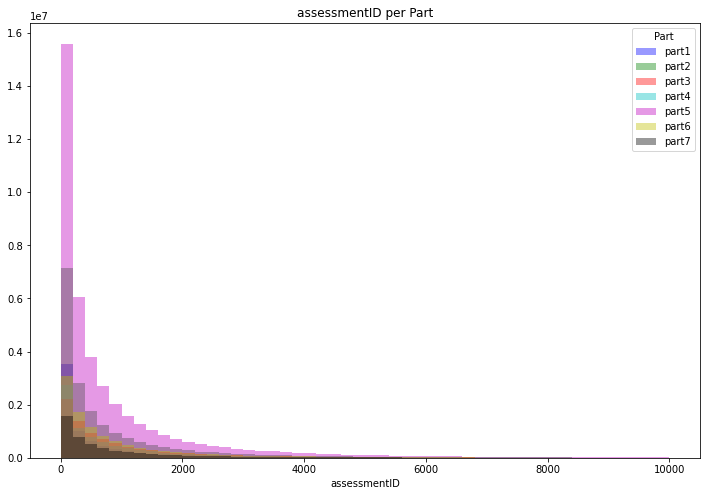

In [70]:
# Memory Error 조심
import seaborn as sns
import matplotlib.pyplot as plt
task_container_id_per_part = {}
for key in range(1,8):
    task_container_id_per_part[f'part{key}'] = train_df.loc[train_df.part==key]['task_container_id']

# 1-1. Multiple histograms on the same axis
colors = ['b','g','r','c','m','y','k']
plt.figure(figsize=(12,8))
for key in range(1,8):
    sns.distplot(task_container_id_per_part[f'part{key}'],color=colors[key-1],hist=True,kde=False,label=f"part{key}")
plt.legend(title="Part")
plt.title('assessmentID per Part')
plt.xlabel('assessmentID')
plt.show()


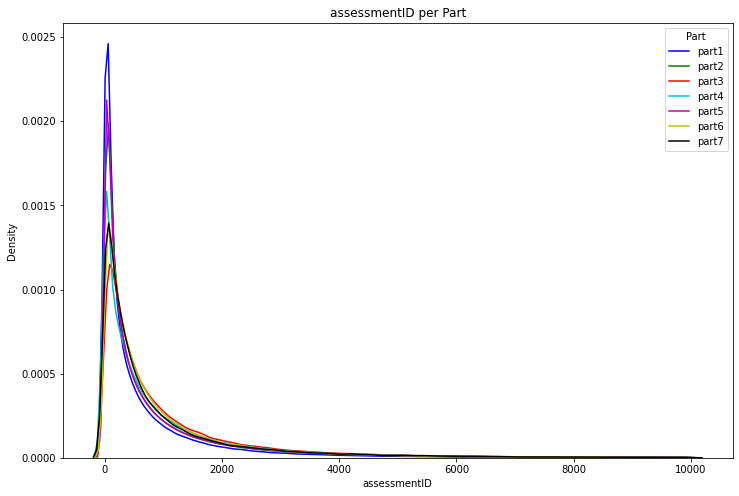

In [71]:
plt.figure(figsize=(12,8))
for key in range(1,8):
    sns.distplot(task_container_id_per_part[f'part{key}'],color=colors[key-1],hist=False,kde=True,label=f"part{key}")
plt.legend(title="Part")
plt.title('assessmentID per Part')
plt.xlabel('assessmentID')
plt.show()


In [6]:
del task_container_id_per_part

### content_id
Riid DataSet의 testId

In [48]:
train_df.content_id.value_counts()

6116.0     213605
6173.0     202106
4120.0     199372
175.0      195861
7876.0     190170
            ...  
1485.0          1
10033.0         1
21169.0         1
1484.0          1
5823.0          1
Name: content_id, Length: 13782, dtype: int64

In [47]:
# Riid Data는 Toeic 시험데이터, Part는 1~7
train_df.part.value_counts()

5.0    40908153
2.0    18743404
6.0    10501472
3.0     8639907
4.0     8067676
1.0     7454570
7.0     4956118
Name: part, dtype: int64

### assessmentItemId
두 데이터의 assessmentItemId 분포비교

In [46]:
train_df.task_container_id.value_counts()

14.0      804285
15.0      798539
4.0       692079
5.0       690051
6.0       688813
           ...  
9927.0       174
9932.0       174
9925.0       172
9937.0       172
9926.0       170
Name: task_container_id, Length: 10000, dtype: int64

In [11]:
train_df.content_id.apply(lambda x: len(str(x))).describe()

count    1.012303e+08
mean     3.939948e+00
std      5.513408e-01
min      1.000000e+00
25%      4.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: content_id, dtype: float64

In [13]:
# Riid Dataset 내에서 
train_df.task_container_id.apply(lambda x: len(str(x))).describe()

count    1.012303e+08
mean     2.976665e+00
std      8.155250e-01
min      1.000000e+00
25%      3.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      4.000000e+00
Name: task_container_id, dtype: float64

## Memory Error때문에 추출

In [12]:
train_df.content_id.value_counts()[:9454]

6116    213605
6173    202106
4120    199372
175     195861
7876    190170
         ...  
4295      2715
4225      2715
3580      2715
5293      2712
4610      2710
Name: content_id, Length: 9454, dtype: int64

In [3]:
train_df = train_df.loc[train_df.content_id.isin(train_df.content_id.value_counts()[:9454].index)]

In [4]:
train_df.task_container_id.value_counts()[:1537]

15.0      771742
14.0      738376
4.0       652080
7.0       649201
5.0       647169
           ...  
1527.0      8829
1526.0      8827
1530.0      8820
1533.0      8820
1537.0      8812
Name: task_container_id, Length: 1535, dtype: int64

In [19]:
train_df = train_df.loc[train_df.task_container_id.isin(train_df.task_container_id.value_counts()[:1537].index)]

In [6]:
print(train_df.shape)

(77317660, 8)


In [10]:
print(len(set(train_df.user_id)))

390537


In [11]:
subsample_user_id = list(set(train_df.user_id))[:250606]
train_df = train_df.loc[train_df.user_id.isin(subsample_user_id),:]
print(train_df.shape)

(49814769, 8)


In [2]:
train_df.dropna(axis=0,inplace=True)

In [3]:
## Memory Error

train_df.content_id = train_df.content_id.astype(int)
train_df.task_container_id = train_df.task_container_id.astype(int)

# Part정보를 변수값 앞에 추가하기 전, Padding으로 길이 맞추기
def pad_2_content(x):
    raw_text = str(x['content_id'])
    part = str(int(x['part']))
    return '0'+part+'0'+'0'*(5-len(raw_text))+raw_text

def pad_2_task_container(x):
    raw_text = str(x['task_container_id'])
    part = str(int(x['part']))
    return '0'+part+'0'+'0'*(4-len(raw_text))+raw_text

train_df.content_id = train_df.apply(lambda x: pad_2_content(x),axis=1)


In [5]:
train_df.task_container_id = train_df.apply(lambda x: pad_2_task_container(x), axis=1)

In [9]:
# import pandas as pd
# train_df.to_pickle('/opt/ml/notebooks/kaggle_riid/dataset/checkpoint_train.pkl')
# train_df = pd.read_pickle('/opt/ml/notebooks/kaggle_riid/dataset/checkpoint_train.pkl')
# original_train = pd.read_csv('/opt/ml/input/data/train_dataset/train_data.csv')

In [10]:
train_df.columns

Index(['timestamp', 'user_id', 'content_id', 'task_container_id',
       'answered_correctly', 'bundle_id', 'part', 'tags'],
      dtype='object')

In [14]:
train_df.drop(
    ['bundle_id'], #'type_of',
    axis=1,
    inplace=True)

train_df = train_df.rename(
                            columns={'timestamp':'Timestamp',
                            'content_id':'testId',
                            'task_container_id':'assessmentItemID',
                            'user_id':'userID',
                            'answered_correctly':'answerCode',
                            'tags':'KnowledgeTag',
                            })

column_ordered = original_train.columns.tolist()
train_df = train_df.loc[:,column_ordered]
train_df.head()

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,115.0,05005692,0500001,1.0,0.0,151
1,115.0,05005716,0500002,1.0,56943.0,168
2,115.0,01000128,0100000,1.0,118363.0,131 149 92
3,115.0,01007860,0100003,1.0,131167.0,131 104 81
4,115.0,01007922,0100004,1.0,137965.0,131 149 92


In [15]:
original_train.head()

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225


In [16]:
print(train_df.isnull().sum())

userID              0
assessmentItemID    0
testId              0
answerCode          0
Timestamp           0
KnowledgeTag        0
dtype: int64


In [17]:
train_df.shape

(48844795, 6)

In [18]:
unique_userid = list(set(train_df.userID))
reset_userid_sort = {val:idx for idx,val in enumerate(unique_userid)}
train_df.userID = train_df.userID.map(reset_userid_sort)
train_df = train_df.sort_values(by=["userID", "Timestamp"], axis=0)

In [19]:
len(unique_userid)

250606

In [28]:
# # SubSampling <= MemoryError때문에
# train_df = train_df.loc[train_df.userID.isin(list(range(250606)))]

In [20]:
# print(train_df.shape)
train_df.head()

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
13136600,0,01007900,0100000,0.0,0.0,131 93 81
13136601,0,01007876,0100001,0.0,25686.0,10 94 92
13136602,0,01000175,0100002,1.0,55569.0,9 10 92
13136603,0,02001278,0200003,1.0,478379872.0,143 140 81 29
13136604,0,03002063,0300004,0.0,478476576.0,136 92 29


In [31]:
# test_df = pd.read_csv('/opt/ml/notebooks/kaggle_riid/dataset/example_test.csv')
# test_df.drop(
#     ['row_id','group_num','content_type_id','prior_question_elapsed_time','prior_question_had_explanation','prior_group_answers_correct','prior_group_responses'], #'type_of',
#     axis=1,
#     inplace=True)
# test_df = test_df.rename(
#                             columns={'timestamp':'Timestamp',
#                             'content_id':'testId',
#                             'task_container_id':'assessmentItemID',
#                             'user_id':'userID',
#                             'answered_correctly':'answerCode',
#                             'tags':'KnowledgeTag',
#                             })
# unique_userid = list(set(test_df.userID))
# reset_userid_sort = {idx:val for idx,val in enumerate(unique_userid)}
# test_df.userID = test_df.userID.map(reset_userid_sort)
# test_df = test_df.sort_values(by=["userID", "Timestamp"], axis=0)
# test_df.head()

## KnowledgeTag
1) unique한 값을 모두 LE로
2) 클러스터링해서 분포가 비슷한 친구들끼리 새로 Tag로 묶어주기
    - Memory Error
3) 여러 태그를 갖는 한 row를 여러 row로 쪼개기
    - 우리 데이터엔 같은 시점에 여러개의 문제를 푼 row들이 없음.

In [21]:
from collections import Counter
all_tags = ' '.join([str(t) for t in train_df.KnowledgeTag])
all_tags = all_tags.split()
print(len(Counter(all_tags)))
# print(len(top_k))
# import matplotlib.pyplot as plt
# plt.hist(all_tags)
# plt.title('After join, histogram')
print('00' in all_tags)
del all_tags

184
False


In [22]:
after_join000 = train_df.KnowledgeTag.apply(lambda x: '00'.join(str(x).split()))
[a for a in after_join000 if not a.isdigit()]

[]

In [23]:
print(after_join000.apply(lambda x: int(x)).isnull().sum())
del after_join000

0


In [ ]:
train_df = train_df.loc[train_df.KnowledgeTag!='',:]
train_df.shape

In [1]:
# import pandas as pd
# train_df.to_pickle('/opt/ml/notebooks/kaggle_riid/dataset/checkpoint_train.pkl')
# train_df = pd.read_pickle('/opt/ml/notebooks/kaggle_riid/dataset/checkpoint_train.pkl')

In [ ]:
# from sklearn.model_selection import train_test_split
# _, test_df = train_test_split(train_df, test_size=0.005, stratify=train_df.KnowledgeTag,random_state=42)

In [2]:
origin_test = pd.read_csv('/opt/ml/input/data/train_dataset/test_data.csv')
test_userid = set(origin_test.userID)
test_df = train_df.loc[train_df.userID.isin(test_userid)==True]
# _ = train_df.loc[train_df.userID.isin(test_userid)==False]
print(train_df.shape)
print(test_df.shape)
del origin_test

(48844795, 6)
(139640, 6)


In [26]:
train_test_id = set(train_df.testId)
test_test_id = set(test_df.testId)
print(len(train_test_id))
print(len(test_test_id))
print(len(test_test_id - train_test_id))

67354
18322
0


In [5]:
train_assessmentItemID = set(train_df.assessmentItemID)
test_assessmentItemID = set(test_df.assessmentItemID)
print(len(train_assessmentItemID))
print(len(test_assessmentItemID))
print(len(test_assessmentItemID - train_assessmentItemID))

9323
9283
0


In [ ]:
print('trian 전처리중 ...')
train_df['KnowledgeTag'] = train_df.KnowledgeTag.apply(lambda x: int('00'.join(str(x).split())))
train_df['assessmentItemID'] = train_df.assessmentItemID.apply(lambda x: str(int(x)))
train_df['testId'] = train_df.testId.apply(lambda x: str(int(x)))
train_df['Timestamp'] = train_df.Timestamp.apply(lambda x: str(int(x)))

print('test 전처리중 ...')
test_df['KnowledgeTag'] = test_df.KnowledgeTag.apply(lambda x: int('00'.join(str(x).split())))
test_df['assessmentItemID'] = test_df.assessmentItemID.apply(lambda x: str(int(x)))
test_df['testId'] = test_df.testId.apply(lambda x: str(int(x)))
test_df['Timestamp'] = test_df.Timestamp.apply(lambda x: str(int(x)))

In [4]:
before_encoder = train_df.KnowledgeTag.values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(before_encoder)
tags_encoded = encoder.transform(before_encoder)
train_df.KnowledgeTag = tags_encoded

In [5]:
import numpy as np
# Label Encoder 주의
# X_test데이터에만 존재하는 새로 출현한 데이터를 신규 클래스로 추가한다 (중요!!!)
before_encoder_test = test_df.KnowledgeTag.values
for label in np.unique(before_encoder_test):
    if label not in encoder.classes_: # unseen label 데이터인 경우( )
        encoder.classes_ = np.append(encoder.classes_, label) # 미처리 시 ValueError발생
test_df.KnowledgeTag = encoder.transform(before_encoder_test)


/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [6]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

userID              0
assessmentItemID    0
testId              0
answerCode          0
Timestamp           0
KnowledgeTag        0
dtype: int64
userID              0
assessmentItemID    0
testId              0
answerCode          0
Timestamp           0
KnowledgeTag        0
dtype: int64


In [12]:
# top_k = 900
# train_vc = train_df.KnowledgeTag.value_counts()
# test_vc = test_df.KnowledgeTag.value_counts()

# len(set(test_vc[:top_k].index)-set(train_vc[:top_k].index))

In [7]:
train_test_id = set(train_df.KnowledgeTag)
test_test_id = set(test_df.KnowledgeTag)
print(len(train_test_id))
print(len(test_test_id))
print(len(test_test_id - train_test_id))

1160
1159
0


In [8]:
# import pandas as pd
# train_df.to_csv('/opt/ml/input/data/train_dataset/kaggle_riid_train.csv',index=False)
# test_df.to_csv('/opt/ml/input/data/train_dataset/kaggle_riid_test.csv',index=False)

# train_df = pd.read_csv('/opt/ml/input/data/train_dataset/kaggle_riid_train.csv')
# test_df = pd.read_csv('/opt/ml/input/data/train_dataset/kaggle_riid_test.csv')


In [9]:
print('trian 전처리중 ...')
train_df.assessmentItemID = train_df.assessmentItemID.apply(lambda x: 'A'+str(x))
train_df.testId = train_df.testId.apply(lambda x: 'A'+str(x))

print('test 전처리중 ...')
test_df.assessmentItemID = test_df.assessmentItemID.apply(lambda x: 'A'+str(x))
test_df.testId = test_df.testId.apply(lambda x: 'A'+str(x))


trian 전처리중 ...
test 전처리중 ...


In [10]:
train_df.to_csv('/opt/ml/input/data/train_dataset/kaggle_riid_train.csv',index=False)
test_df.to_csv('/opt/ml/input/data/train_dataset/kaggle_riid_test.csv',index=False)


In [11]:
train_df = pd.read_csv('/opt/ml/input/data/train_dataset/kaggle_riid_train.csv')
train_df.dtypes

userID                int64
assessmentItemID     object
testId               object
answerCode          float64
Timestamp             int64
KnowledgeTag          int64
dtype: object